# **Preliminary Data Analysis**

#Imports :

In [ ]:
# Data manipulation and visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning models
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import xgboost as xgb

# Model evaluation and metrics
from sklearn.metrics import mean_squared_error, r2_score, classification_report, coverage_error ,make_scorer

# Data preprocessing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler,PolynomialFeatures,PowerTransformer
from sklearn.decomposition import PCA

In [ ]:
data = pd.read_pickle('/content/ass3.pickle')

train_data = data['train']
dev_data = data['dev']
test_data = data['test']

train_df = pd.DataFrame(train_data)
dev_df = pd.DataFrame(dev_data)
test_df = pd.DataFrame(test_data)

           f0    f1        f2        f3      f4        f5     f6      f7  \
14981  4.0391  15.0  6.297710  0.992366   334.0  2.549618  32.72 -116.99   
6614   4.7241  46.0  5.375758  0.954545   753.0  2.281818  34.17 -118.10   
14233  3.3553   7.0  5.229213  1.101124  1304.0  2.930337  32.70 -117.01   
1802   1.3929  52.0  5.000000  0.953488   126.0  2.930233  37.92 -122.36   
6030   1.6006  52.0  4.427083  1.017361  1246.0  2.163194  34.07 -117.75   

       target  
14981   1.695  
6614    2.796  
14233   1.322  
1802    1.042  
6030    1.462  
                 f0            f1            f2            f3            f4  \
count  12210.000000  12244.000000  12226.000000  12228.000000  12215.000000   
mean       3.872771     28.630595      5.420978      1.096626   1426.830618   
std        1.919183     12.566127      2.382548      0.471398   1103.528284   
min        0.499900      1.000000      0.846154      0.500000      3.000000   
25%        2.555600     18.000000      4.430232     

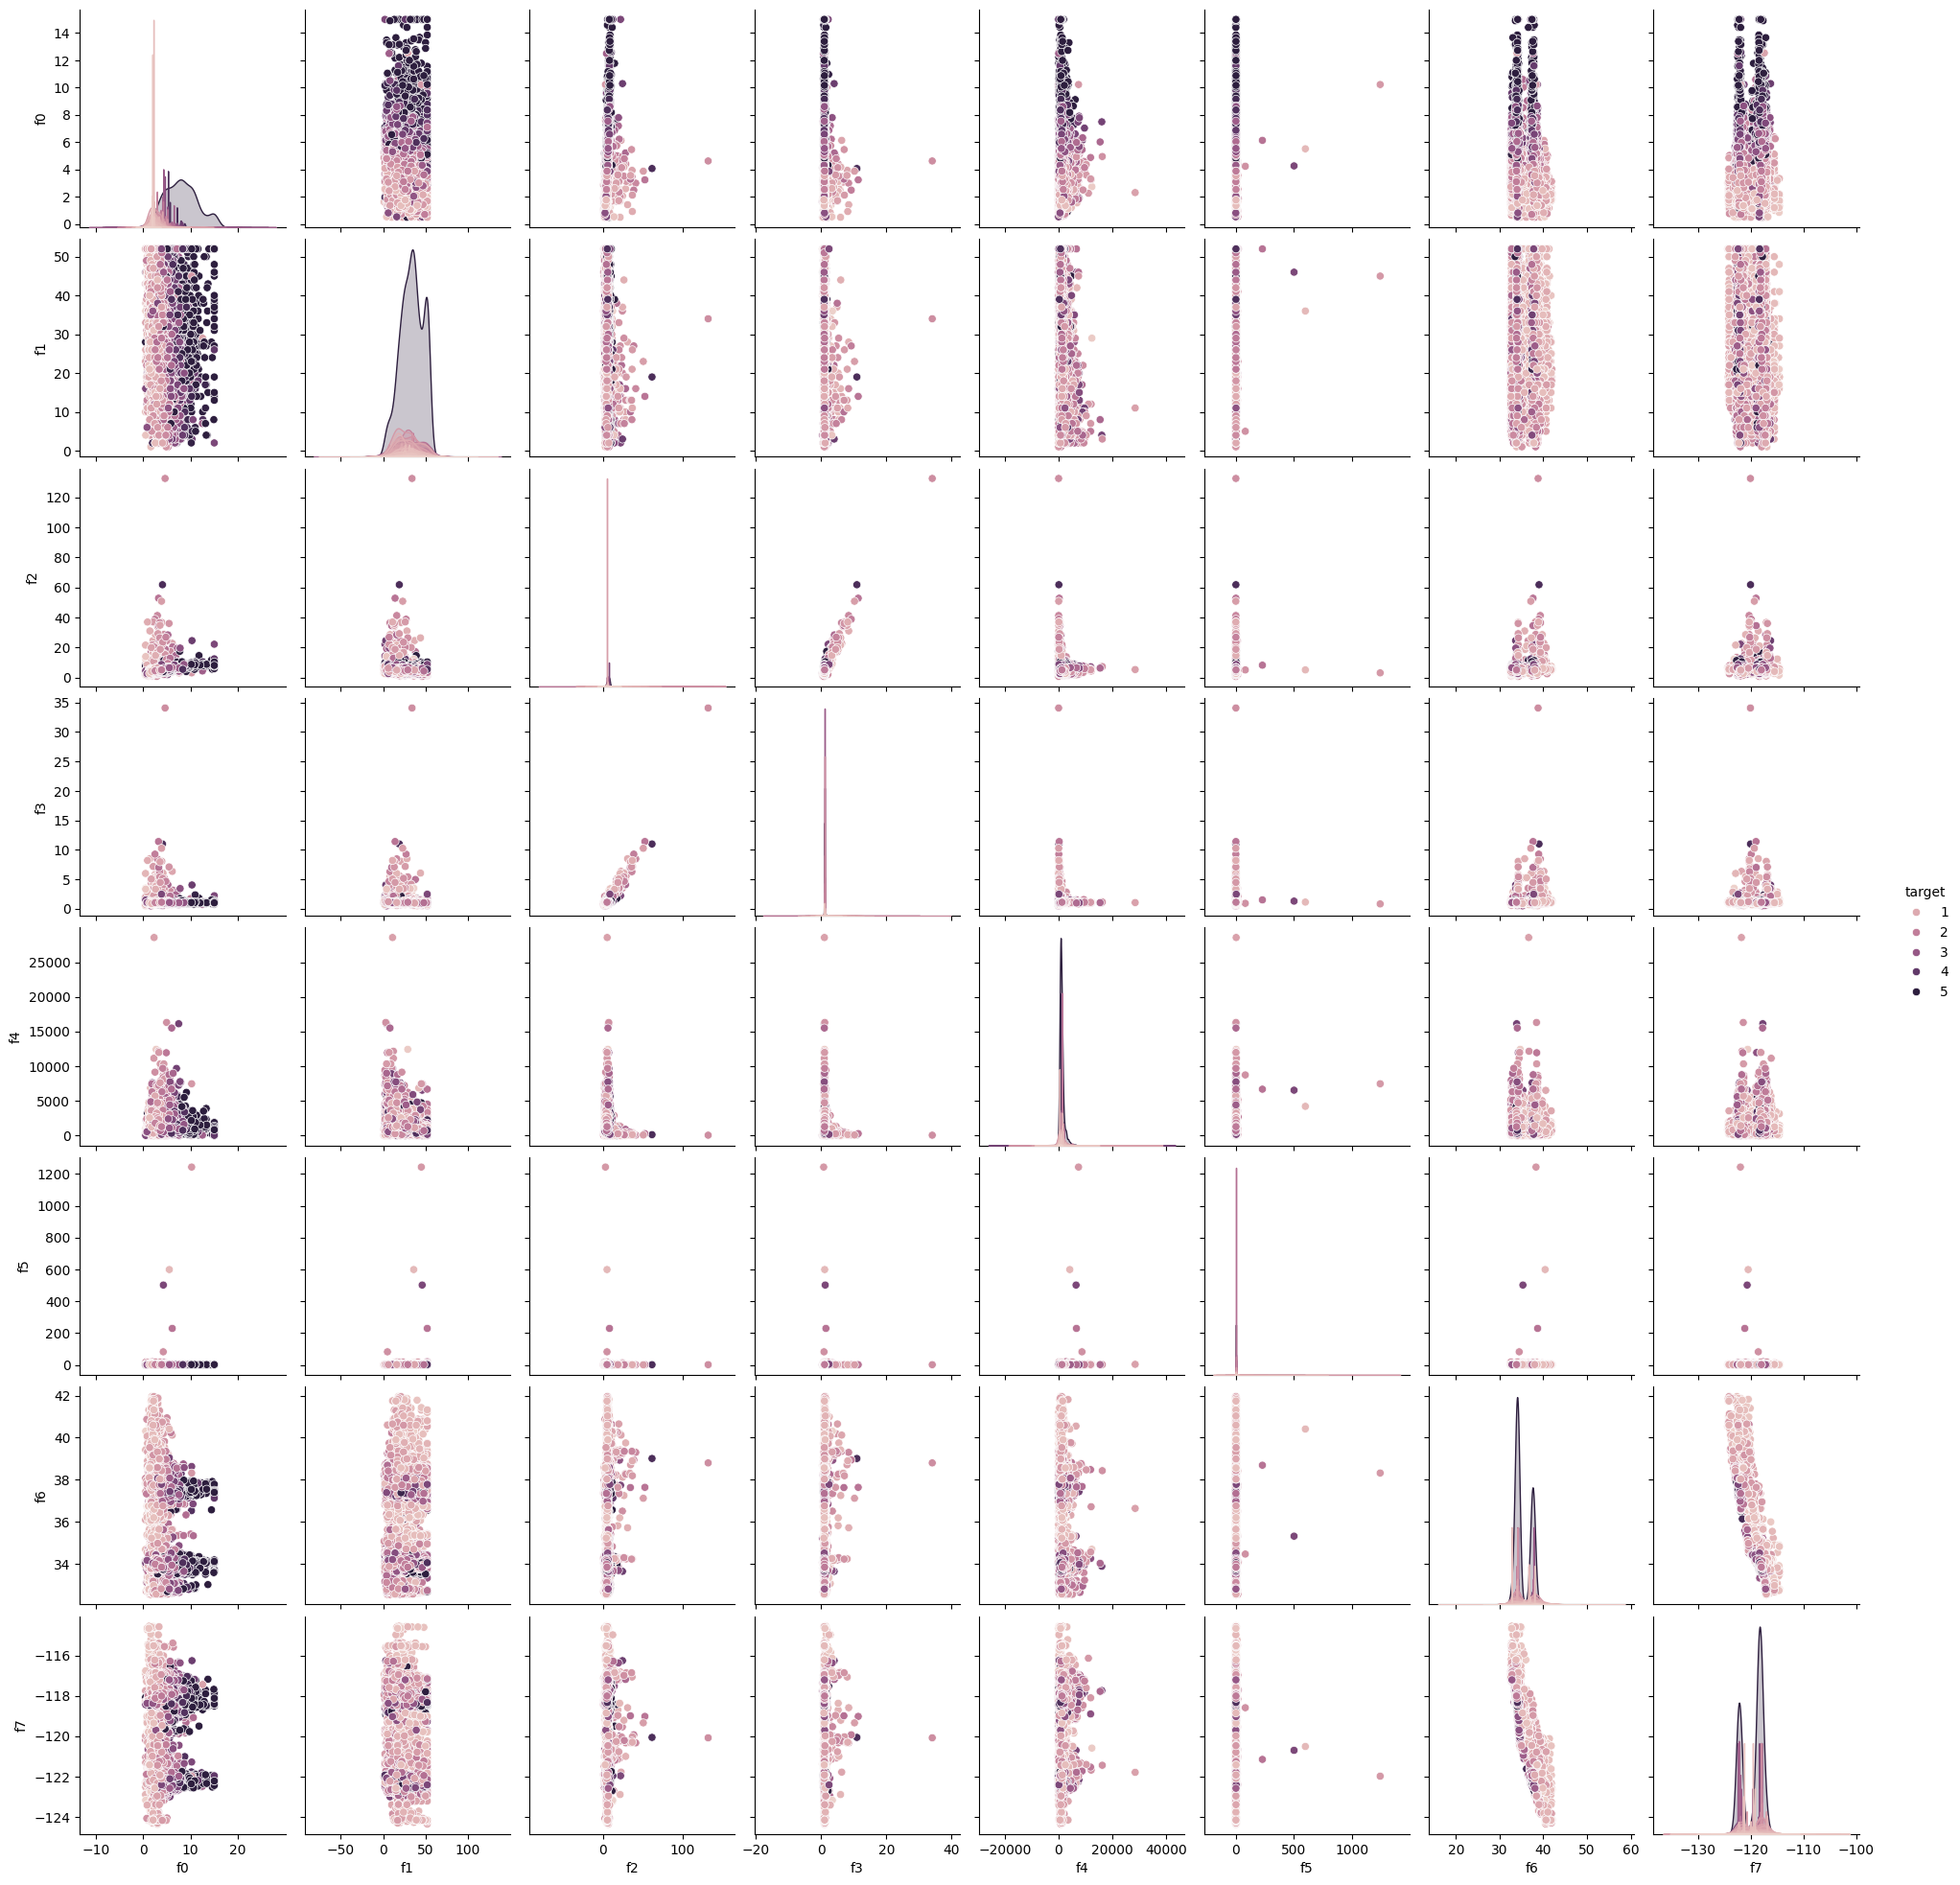

In [ ]:
# for train
print(train_df.head())
print(train_df.describe())
print(train_df.info())

# for dev
print(dev_df.head())
print(dev_df.describe())
print(dev_df.info())

# for test
print(test_df.head())
print(test_df.describe())
print(test_df.info())

# Plotting function
def plot_it_better(df):
    sns.pairplot(df, hue='target')
    plt.show()

# Visualize train data
plot_it_better(train_df)




# Handling Missing Values
The dataset contains missing values in several columns.
We used the SimpleImputer class from scikit-learn with the strategy set to 'mean', which replaces missing values with the mean value of each column. This step is crucial as many models cannot handle missing values directly.

In [ ]:
X_train = train_df.drop('target', axis=1)  # Replace 'target_column' with actual target column name
y_train = train_df['target']

X_dev = dev_df.drop('target', axis=1)
y_dev = dev_df['target']

X_test = test_df.drop('target', axis=1)
y_test = test_df['target']


# Handling Missing Values
imputer = SimpleImputer(strategy='mean')

X_train_imputed = imputer.fit_transform(X_train)
X_dev_imputed = imputer.transform(X_dev)
X_test_imputed = imputer.transform(X_test)

# The different models we tried


*   Linear Regression
*   KNeighbors Regressor
*   Decision Tree Regressor
*   Random Forest Regressor
*   AdaBoost Regressor
*   Gradient Boosting Regressor
*   SVR
*   XGBoost
*   Lasso Regression
*   Ridge Regression







# Evaluation function for the models.

the evaluation matrices we chose:

*   Mean Squared Error (MSE)
*   R-squared (R²)


**MSE**: Measures the average squared difference between the actual and predicted values. Lower values are better.


**R²**: Represents the proportion of variance in the dependent variable that is predictable from the independent variables. Values range from 0 to 1, with higher values indicating better fit.

In [ ]:
def evaluate_regressor(regressor, X_train, y_train, X_dev, y_dev):
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_dev)

    mse = mean_squared_error(y_dev, y_pred)
    r2 = r2_score(y_dev, y_pred)

    print(f'{regressor.__class__.__name__} Performance:')
    print(f'MSE: {mse}')
    print(f'R²: {r2}')

    return mse, r2

In [ ]:
# Store results
mse_results = {}
r2_results = {}

# Models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "KNeighbors Regressor": KNeighborsRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(),
    "SVR": SVR(),
    "XGBoost": xgb.XGBRegressor(),
    "Lasso Regression": Lasso(max_iter=10000, alpha=10.0),
    "Ridge Regression": Ridge(max_iter=10000, alpha=100.0)
}

print("Evaluating models with original data:")
for name, model in models.items():
    mse, r2 = evaluate_regressor(model, X_train_imputed, y_train, X_dev_imputed, y_dev)
    mse_results[name] = mse
    r2_results[name] = r2

# Find the best models with original data
best_mse_model = min(mse_results, key=mse_results.get)
best_r2_model = max(r2_results, key=r2_results.get)

print(f'\nBest Model based on MSE (Original Data): {best_mse_model} with MSE = {mse_results[best_mse_model]}')
print(f'Best Model based on R² (Original Data): {best_r2_model} with R² = {r2_results[best_r2_model]}')

Evaluating models with original data:
LinearRegression Performance:
MSE: 0.5229043349016068
R²: 0.6008414936534727
KNeighborsRegressor Performance:
MSE: 1.1588457623511084
R²: 0.11539623462270576
DecisionTreeRegressor Performance:
MSE: 0.5972233147520591
R²: 0.5441101739640191
RandomForestRegressor Performance:
MSE: 0.26854485053882027
R²: 0.7950065542135984
AdaBoostRegressor Performance:
MSE: 0.7167230354635015
R²: 0.4528901804694502
GradientBoostingRegressor Performance:
MSE: 0.29576214702115255
R²: 0.7742302578902517
SVR Performance:
MSE: 1.351774899648952
R²: -0.03187603132441419
XGBRegressor Performance:
MSE: 0.23387224399644888
R²: 0.821473854090158
Lasso Performance:
MSE: 1.3090060281120963
R²: 0.0007715444199906107
Ridge Performance:
MSE: 0.5247425323713286
R²: 0.5994383074348651

Best Model based on MSE (Original Data): XGBoost with MSE = 0.23387224399644888
Best Model based on R² (Original Data): XGBoost with R² = 0.821473854090158


As of now it seems that **XGBoost** has achieved the best results.
In the following part, we will run some preprocessing function to enhances the performance of the models, leading to more reliable and robust outcomes.

#**preprocessing**
we alredy handle the missing Values,
now we are testing different preprocessing methods to determine the best approach for improving our regression models. The preprocessing methods we are evaluating include:



**Original Data:**
Using the raw data without any scaling or transformations.

**Scaled Data:**
Standardizing the features using StandardScaler. This helps to ensure that all features contribute equally to the model.

**Polynomial Features:**
Generating interaction terms and polynomial features up to a specified degree. This can capture non-linear relationships between features and the target variable.

**Scaled Polynomial Features:**
Applying both polynomial feature generation and scaling. This combines the benefits of capturing non-linear interactions and ensuring that features are standardized.

**PCA:**
Applying PCA to reduce the dimensionality of the dataset while preserving as much variance as possible. This can help improve model performance by reducing noise and collinearity.

**Scaled PCA:**
Applying scaling before PCA to ensure that all features contribute equally to the principal components.

**Power Transformer:**
Applying a power transformation to each feature to make the data more Gaussian-like. This helps stabilize variance and minimize skewness.

**Scaled Power Transformer:**
Applying scaling before the power transformation to combine the benefits of standardization and power transformation.

To evaluate the effectiveness of these preprocessing methods, we use cross-validation with the KFold method.

In [ ]:
# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_dev_scaled = scaler.transform(X_dev_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Polynomial Features with interaction only (degree=2)
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train_imputed)
X_dev_poly = poly.transform(X_dev_imputed)
X_test_poly = poly.transform(X_test_imputed)

# Scale the polynomial features
X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_dev_poly_scaled = scaler.transform(X_dev_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)

# PCA
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_train_pca = pca.fit_transform(X_train_imputed)
X_dev_pca = pca.transform(X_dev_imputed)
X_test_pca = pca.transform(X_test_imputed)

# Scaled PCA
X_train_scaled_pca = pca.fit_transform(X_train_scaled)
X_dev_scaled_pca = pca.transform(X_dev_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)

# Power Transformer
pt = PowerTransformer()
X_train_power = pt.fit_transform(X_train_imputed)
X_dev_power = pt.transform(X_dev_imputed)
X_test_power = pt.transform(X_test_imputed)

# Scaled Power Transformer
X_train_scaled_power = pt.fit_transform(X_train_scaled)
X_dev_scaled_power = pt.transform(X_dev_scaled)
X_test_scaled_power = pt.transform(X_test_scaled)

In [ ]:
# Cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score)

def cross_val_evaluate(model, X, y):
    mse_scores = cross_val_score(model, X, y, cv=kf, scoring=mse_scorer)
    r2_scores = cross_val_score(model, X, y, cv=kf, scoring=r2_scorer)
    return -mse_scores.mean(), r2_scores.mean()

# Store cross-validation results
cv_results = {
    'Original': {},
    'Scaled': {},
    'Poly': {},
    'Poly_Scaled': {},
    'PCA': {},
    'Scaled_PCA': {},
    'Power': {},
    'Scaled_Power': {}
}

# Evaluate models with cross-validation
print("Cross-validation with original data:")
for name, model in models.items():
    mse, r2 = cross_val_evaluate(model, X_train_imputed, y_train)
    cv_results['Original'][name] = (mse, r2)
    print(f'{name}: MSE = {mse:.4f}, R² = {r2:.4f}')

print("\nCross-validation with scaled data:")
for name, model in models.items():
    mse, r2 = cross_val_evaluate(model, X_train_scaled, y_train)
    cv_results['Scaled'][name] = (mse, r2)
    print(f'{name}: MSE = {mse:.4f}, R² = {r2:.4f}')

print("\nCross-validation with polynomial features:")
for name, model in models.items():
    mse, r2 = cross_val_evaluate(model, X_train_poly, y_train)
    cv_results['Poly'][name] = (mse, r2)
    print(f'{name}: MSE = {mse:.4f}, R² = {r2:.4f}')

print("\nCross-validation with scaled polynomial features:")
for name, model in models.items():
    mse, r2 = cross_val_evaluate(model, X_train_poly_scaled, y_train)
    cv_results['Poly_Scaled'][name] = (mse, r2)
    print(f'{name}: MSE = {mse:.4f}, R² = {r2:.4f}')

print("\nCross-validation with PCA:")
for name, model in models.items():
    mse, r2 = cross_val_evaluate(model, X_train_pca, y_train)
    cv_results['PCA'][name] = (mse, r2)
    print(f'{name}: MSE = {mse:.4f}, R² = {r2:.4f}')

print("\nCross-validation with scaled PCA:")
for name, model in models.items():
    mse, r2 = cross_val_evaluate(model, X_train_scaled_pca, y_train)
    cv_results['Scaled_PCA'][name] = (mse, r2)
    print(f'{name}: MSE = {mse:.4f}, R² = {r2:.4f}')

Cross-validation with original data:
Linear Regression: MSE = 0.5516, R² = 0.5814
KNeighbors Regressor: MSE = 1.2153, R² = 0.0772
Decision Tree Regressor: MSE = 0.5840, R² = 0.5559
Random Forest Regressor: MSE = 0.2888, R² = 0.7815
AdaBoost Regressor: MSE = 0.7130, R² = 0.4538
Gradient Boosting Regressor: MSE = 0.3110, R² = 0.7645
SVR: MSE = 1.3650, R² = -0.0361
XGBoost: MSE = 0.2540, R² = 0.8072
Lasso Regression: MSE = 1.3171, R² = -0.0000
Ridge Regression: MSE = 0.5504, R² = 0.5823

Cross-validation with scaled data:
Linear Regression: MSE = 0.5516, R² = 0.5814
KNeighbors Regressor: MSE = 0.4638, R² = 0.6481
Decision Tree Regressor: MSE = 0.5916, R² = 0.5555
Random Forest Regressor: MSE = 0.2885, R² = 0.7806
AdaBoost Regressor: MSE = 0.7142, R² = 0.4394
Gradient Boosting Regressor: MSE = 0.3111, R² = 0.7641
SVR: MSE = 0.3936, R² = 0.7014
XGBoost: MSE = 0.2540, R² = 0.8072
Lasso Regression: MSE = 1.3178, R² = -0.0005
Ridge Regression: MSE = 0.5516, R² = 0.5814

Cross-validation with p

# Findings
Through our extensive cross-validation, we found that the Scaled Power Transformer preprocessing method consistently produced the best results across various models.

# Hyper-Parameters

In the following part, we will use GridSearchCv in order to find the best hyper-parameters and run all of the models again to view the best case results.

# K-Nearest Neighbors Regressor

n_neighbors: Number of neighbors to consider.

weights: How to weight the neighbors' votes.

metric: How to measure distance between points.

In [ ]:
# KNeighbors Regressor
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
knn_grid_search = GridSearchCV(estimator=KNeighborsRegressor(), param_grid=knn_param_grid, cv=3, n_jobs=-1, verbose=2)
knn_grid_search.fit(X_train_scaled_power, y_train)

best_knn = knn_grid_search.best_estimator_
print(f'Best KNeighbors Hyperparameters: {knn_grid_search.best_params_}')
y_pred_best_knn = best_knn.predict(X_dev_scaled_power)
best_knn_mse = mean_squared_error(y_dev, y_pred_best_knn)
print(f'Best KNeighbors MSE after tuning: {best_knn_mse}')
print(f'R²: {r2_score(y_dev, y_pred_best_knn)}')

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best KNeighbors Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Best KNeighbors MSE after tuning: 0.3435911068173942
R²: 0.7377200687827771


# Decision Tree Regressor

criterion: Function to measure the quality of a split

splitter: Strategy to choose the split at each node

max_depth: Maximum depth of each tree.

min_samples_split: Minimum samples needed to split a node.

min_samples_leaf: Minimum samples needed at a leaf node.

In [ ]:
# Decision Tree Regressor
dt_param_grid = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 10, 20]
}

dt_grid_search = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=dt_param_grid, cv=2, n_jobs=-1, verbose=2)
dt_grid_search.fit(X_train_scaled_power, y_train)

best_dt = dt_grid_search.best_estimator_
print(f'Best Decision Tree Hyperparameters: {dt_grid_search.best_params_}')
y_pred_best_dt = best_dt.predict(X_dev_scaled_power)
best_dt_mse = mean_squared_error(y_dev, y_pred_best_dt)
print(f'Best Decision Tree MSE after tuning: {best_dt_mse}')
print(f'R²: {r2_score(y_dev, y_pred_best_dt)}')


Fitting 2 folds for each of 288 candidates, totalling 576 fits
Best Decision Tree Hyperparameters: {'criterion': 'squared_error', 'max_depth': None, 'min_samples_leaf': 20, 'min_samples_split': 10, 'splitter': 'best'}
Best Decision Tree MSE after tuning: 0.39630045556883836
R²: 0.69748443959817


# Random Forest Regressor

n_estimators: Number of trees in the forest.

criterion: Function to measure the quality of a split.

max_depth: Maximum depth of each tree.

min_samples_split: Minimum samples needed to split a node.

min_samples_leaf: Minimum samples needed at a leaf node.

In [ ]:
# Random Forest Regressor
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'criterion': ['squared_error', 'absolute_error'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [10, 20],
    'min_samples_leaf': [10, 20]
}

rf_grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=rf_param_grid, cv=2, n_jobs=-1, verbose=2)
rf_grid_search.fit(X_train_scaled_power, y_train)

best_rf = rf_grid_search.best_estimator_
print(f'Best Random Forest Hyperparameters: {rf_grid_search.best_params_}')
y_pred_best_rf = best_rf.predict(X_dev_scaled_power)
best_rf_mse = mean_squared_error(y_dev, y_pred_best_rf)
print(f'Best Random Forest MSE after tuning: {best_rf_mse}')
print(f'R²: {r2_score(y_dev, y_pred_best_rf)}')

Fitting 2 folds for each of 72 candidates, totalling 144 fits
Best Random Forest Hyperparameters: {'criterion': 'squared_error', 'max_depth': 30, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 300}
Best Random Forest MSE after tuning: 0.28676245399661526
R²: 0.7811001646504003


# AdaBoost Regressor

n_estimators: Number of boosting stages.

learning_rate: Weight of each stage.

In [ ]:
# AdaBoost Regressor
ada_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}
ada_grid_search = GridSearchCV(estimator=AdaBoostRegressor(), param_grid=ada_param_grid, cv=3, n_jobs=-1, verbose=2)
ada_grid_search.fit(X_train_scaled_power, y_train)

best_ada = ada_grid_search.best_estimator_
print(f'Best AdaBoost Hyperparameters: {ada_grid_search.best_params_}')
y_pred_best_ada = best_ada.predict(X_dev_scaled_power)
best_ada_mse = mean_squared_error(y_dev, y_pred_best_ada)
print(f'Best AdaBoost MSE after tuning: {best_ada_mse}')
print(f'R²: {r2_score(y_dev, y_pred_best_ada)}')


Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best AdaBoost Hyperparameters: {'learning_rate': 0.1, 'n_estimators': 50}
Best AdaBoost MSE after tuning: 0.5584910440585447
R²: 0.5736764144510897


# Gradient Boosting Regressor

n_estimators: Number of boosting stages.

learning_rate: Weight of each tree.

max_depth: Maximum depth of each tree.

min_samples_split: Minimum samples required to split an internal node.

min_samples_leaf: Minimum samples required to be at a leaf node

In [ ]:
# Gradient Boosting Regressor
gbr_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 10, 20]
}
gbr_grid_search = GridSearchCV(estimator=GradientBoostingRegressor(), param_grid=gbr_param_grid, cv=3, n_jobs=-1, verbose=2)
gbr_grid_search.fit(X_train_scaled_power, y_train)

best_gbr = gbr_grid_search.best_estimator_
print(f'Best Gradient Boosting Hyperparameters: {gbr_grid_search.best_params_}')
y_pred_best_gbr = best_gbr.predict(X_dev_scaled_power)
best_gbr_mse = mean_squared_error(y_dev, y_pred_best_gbr)
print(f'Best Gradient Boosting MSE after tuning: {best_gbr_mse}')
print(f'R²: {r2_score(y_dev, y_pred_best_gbr)}')

Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best Gradient Boosting Hyperparameters: {'learning_rate': 0.1, 'max_depth': 7, 'min_samples_leaf': 20, 'min_samples_split': 10, 'n_estimators': 300}
Best Gradient Boosting MSE after tuning: 0.2140734644496435
R²: 0.8365872328554614


# SVR

kernel: Specifies the kernel type to be used.

C: Regularization parameter.

gamma: Kernel coefficient.

In [ ]:
# SVR
svr_param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}
svr_grid_search = GridSearchCV(estimator=SVR(), param_grid=svr_param_grid, cv=3, n_jobs=-1, verbose=2)
svr_grid_search.fit(X_train_scaled_power, y_train)

best_svr = svr_grid_search.best_estimator_
print(f'Best SVR Hyperparameters: {svr_grid_search.best_params_}')
y_pred_best_svr = best_svr.predict(X_dev_scaled_power)
best_svr_mse = mean_squared_error(y_dev, y_pred_best_svr)
print(f'Best SVR MSE after tuning: {best_svr_mse}')
print(f'R²: {r2_score(y_dev, y_pred_best_svr)}')

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best SVR Hyperparameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Best SVR MSE after tuning: 0.30761889374592305
R²: 0.7651794220166516


# XGBoost

n_estimators: Number of boosting rounds.

learning_rate: Step size shrinkage.

max_depth: Maximum depth of a tree.

min_child_weight: Minimum sum of instance weight (hessian) needed in a child.

subsample: Subsample ratio of the training instances.

colsample_bytree: Subsample ratio of columns when constructing each tree.

In [ ]:
# XGBoost
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 5, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}
xgb_grid_search = GridSearchCV(estimator=xgb.XGBRegressor(), param_grid=xgb_param_grid, cv=2, n_jobs=-1, verbose=2)
xgb_grid_search.fit(X_train_scaled_power, y_train)

best_xgb = xgb_grid_search.best_estimator_
print(f'Best XGBoost Hyperparameters: {xgb_grid_search.best_params_}')
y_pred_best_xgb = best_xgb.predict(X_dev_scaled_power)
best_xgb_mse = mean_squared_error(y_dev, y_pred_best_xgb)
print(f'Best XGBoost MSE after tuning: {best_xgb_mse}')
print(f'R²: {r2_score(y_dev, y_pred_best_xgb)}')


Fitting 2 folds for each of 729 candidates, totalling 1458 fits
Best XGBoost Hyperparameters: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 1.0}
Best XGBoost MSE after tuning: 0.20918496800835576
R²: 0.8403188617740702


# Lasso Regression

alpha: Constant that multiplies the L1 term

In [ ]:
# Lasso Regression
lasso_param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100]
}
lasso_grid_search = GridSearchCV(estimator=Lasso(max_iter=10000), param_grid=lasso_param_grid, cv=3, n_jobs=-1, verbose=2)
lasso_grid_search.fit(X_train_scaled_power, y_train)

best_lasso = lasso_grid_search.best_estimator_
print(f'Best Lasso Hyperparameters: {lasso_grid_search.best_params_}')
y_pred_best_lasso = best_lasso.predict(X_dev_scaled_power)
best_lasso_mse = mean_squared_error(y_dev, y_pred_best_lasso)
print(f'Best Lasso MSE after tuning: {best_lasso_mse}')
print(f'R²: {r2_score(y_dev, y_pred_best_lasso)}')


Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Lasso Hyperparameters: {'alpha': 0.01}
Best Lasso MSE after tuning: 0.5044378606937638
R²: 0.614937858457326


# Ridge Regression

alpha: Constant that multiplies the L2 term

In [ ]:
# Ridge Regression
ridge_param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100]
}
ridge_grid_search = GridSearchCV(estimator=Ridge(max_iter=10000), param_grid=ridge_param_grid, cv=3, n_jobs=-1, verbose=2)
ridge_grid_search.fit(X_train_scaled_power, y_train)

best_ridge = ridge_grid_search.best_estimator_
print(f'Best Ridge Hyperparameters: {ridge_grid_search.best_params_}')
y_pred_best_ridge = best_ridge.predict(X_dev_scaled_power)
best_ridge_mse = mean_squared_error(y_dev, y_pred_best_ridge)
print(f'Best Ridge MSE after tuning: {best_ridge_mse}')
print(f'R²: {r2_score(y_dev, y_pred_best_ridge)}')

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Ridge Hyperparameters: {'alpha': 1}
Best Ridge MSE after tuning: 0.4990573120619768
R²: 0.6190450949283969


# results:
We conducted a hyperparameter tuning process for all the models. After evaluating various combinations of parameters, the best model results were obtained with the following hyperparameters:

**XGBoost**
* colsample_bytree : 0.6
* learning_rate : 0.1
* max_depth : 7
* min_child_weight : 1
* n_estimators : 300
* subsample : 1.0

Now, we will run the test part to evaluate the model on unseen data.


In [ ]:
# Final evaluation on the test set using the best XGBoost model
best_model = best_xgb
y_test_pred = best_model.predict(X_test_scaled_power)

test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
print(f'Test MSE: {test_mse}')
print(f'Test R²: {test_r2}')


Test MSE: 0.20625543011832376
Test R²: 0.852140181912289
